In [ ]:
import sys
sys.path.append('./Modeling')
sys.path.append('./Data')

In [ ]:
# !pip install pyspark

In [2]:
from regression import get_parquet_data, log_transformation, encoding_data, split_data, randomforest_grid_search, save_model, load_model, model_eval

In [3]:
# 전처리 완료 데이터 불러오기
file_path = './Data/csv'

ride_df, alight_df = get_parquet_data(file_path)

In [4]:
# 데이터프레임 형태 확인
ride_df.info()
alight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143520 entries, 0 to 143519
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lon     143520 non-null  float64
 1   lat     143520 non-null  float64
 2   tmp     143520 non-null  float64
 3   wsd     143520 non-null  float64
 4   pcp     143520 non-null  float64
 5   Hour    143520 non-null  int32  
 6   RIDE    143520 non-null  float64
dtypes: float64(6), int32(1)
memory usage: 7.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143520 entries, 0 to 143519
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lon     143520 non-null  float64
 1   lat     143520 non-null  float64
 2   tmp     143520 non-null  float64
 3   wsd     143520 non-null  float64
 4   pcp     143520 non-null  float64
 5   Hour    143520 non-null  int32  
 6   ALIGHT  143520 non-null  float64
dtypes: float64(6), int32(1)
memory usage: 7.1

# 왜도, 첨도 확인

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\eunbi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

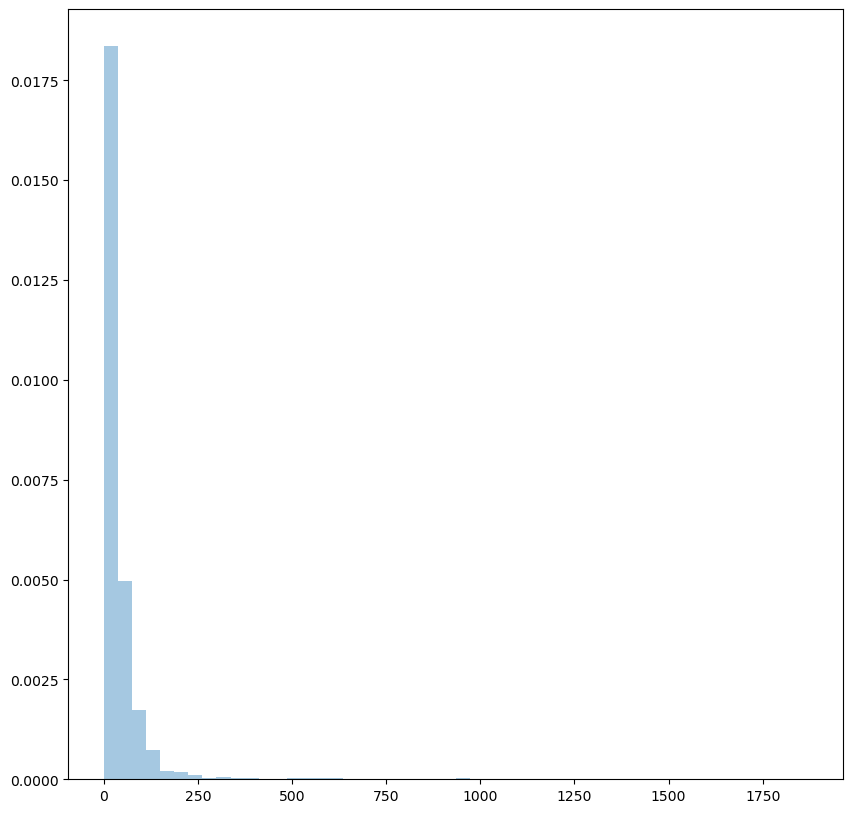

In [8]:
plt.figure(figsize=(10, 10))
sns.distplot(ride_df['RIDE'])

plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(alight_df['ALIGHT'])

plt.show()

# 로그 변환, 스케일링, 인코딩

In [9]:
# 로그 변환
ride_df = log_transformation(ride_df, 'RIDE')
alight_df = log_transformation(alight_df, 'ALIGHT')

In [10]:
print("Skewness: {:.3f}".format(ride_df['RIDE_log'].skew()))
print("Kurtosis: {:.3f}".format(ride_df['RIDE_log'].kurt()))

print("Skewness: {:.3f}".format(alight_df['ALIGHT_log'].skew()))
print("Kurtosis: {:.3f}".format(alight_df['ALIGHT_log'].kurt()))

Skewness: 0.096
Kurtosis: 0.631
Skewness: -0.030
Kurtosis: -0.561


In [11]:
# 스케일러, 인코딩 적용
ride_df_encoding = encoding_data(ride_df)
alight_df_encoding = encoding_data(alight_df)

# 훈련 데이터, 학습 데이터 분리

In [12]:
ride_X_train, ride_X_test, ride_y_train, ride_y_test = split_data(ride_df_encoding, ride_df['RIDE_log'])
alight_X_train, alight_X_test, alight_y_train, alight_y_test = split_data(alight_df_encoding, alight_df['ALIGHT_log'])

# 최적 파라미터 구하기

In [13]:
rf_best_model_ride = randomforest_grid_search(ride_X_train, ride_y_train)

c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib

In [14]:
rf_best_model_alight = randomforest_grid_search(alight_X_train, alight_y_train)

c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib

In [15]:
model_eval(rf_best_model_ride, ride_X_train, ride_X_test, ride_y_train, ride_y_test)
model_eval(rf_best_model_alight, alight_X_train, alight_X_test, alight_y_train, alight_y_test)

c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) RMSE (train) :  0.22127668209530796
RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) R2 (train) :  0.9550763779558472
RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) RMSE (test) :  0.24573817614634957
RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) R2 (test) :  0.9441735525425132


c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) RMSE (train) :  0.25683832434112075
RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) R2 (train) :  0.9632430920496586
RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) RMSE (test) :  0.28166009822685867
RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=6,
                      n_estimators=200, n_jobs=-1, random_state=42) R2 (test) :  0.9555243497536028


c:\Users\eunbi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# 모델 저장

In [ ]:
save_model(rf_best_model_ride)
save_model(rf_best_model_alight)

# 승객 수 예측

In [ ]:
# 모델 불러오기
ride_loaded_model = load_model(rf_best_model_ride)
alight_loaded_model = load_model(rf_best_model_alight)

In [ ]:
# 기후 데이터 불러오기
pred_weather_df = get_weather_data(path, weather.csv)

# 기후 데이터 스케일러, 인코딩 적용
pred_weather_df = encoding_data(pred_weather_df)

# 기후 데이터를 바탕으로 승객 수 예측

In [ ]:
ride_predictions = ride_loaded_model.predict(pred_weather_df)
alight_predictions = alight_loaded_model.predict(pred_weather_df)

In [ ]:
# 로그 역변환
ride_reversed_values = np.exp(ride_predictions)
alight_reversed_values = np.exp(alight_predictions)

print("역변환된 값 : ", ride_reversed_values)
print("역변환된 값 : ", alight_reversed_values)